In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
%matplotlib inline

In [2]:
insur = pd.read_csv('insurance.csv')

In [3]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


In [4]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(insur.iloc[:,:])


In [5]:
df_norm

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,0.000000,0.050847,0.725000,0.019569,0.000000
1,0.005535,0.067797,0.403125,0.003236,0.010101
2,0.011070,0.084746,0.446875,0.006001,0.020202
3,0.016605,0.118644,0.200000,0.000000,0.030303
4,0.022140,0.152542,0.171875,0.000316,0.040404
...,...,...,...,...,...
95,0.840406,0.677966,0.234375,0.145178,0.959596
96,0.848708,0.661017,0.515625,0.222490,0.969697
97,0.857011,0.610169,0.518750,0.225849,0.979798
98,0.865314,0.593220,0.762500,0.390680,0.989899


In [6]:
###### screw plot or elbow curve ############
k = list(range(2,7))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x281c4e40a58>,
 <a list of 5 Text xticklabel objects>)

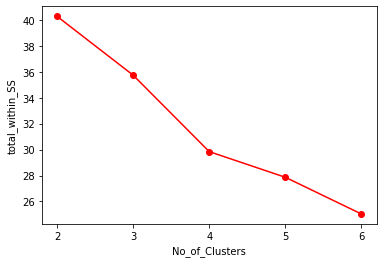

In [7]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)


In [8]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
insur['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()


,Premiums Paid,Age,Days to Renew,Claims made,Income
0,0.000000,0.050847,0.725000,0.019569,0.000000
1,0.005535,0.067797,0.403125,0.003236,0.010101
2,0.011070,0.084746,0.446875,0.006001,0.020202
3,0.016605,0.118644,0.200000,0.000000,0.030303
4,0.022140,0.152542,0.171875,0.000316,0.040404


In [9]:
insur.head(100)

,Premiums Paid,Age,Days to Renew,Claims made,Income,clust
0,2800,26,233,3890.076336,28000,0
1,2950,27,130,2294.444444,29500,2
2,3100,28,144,2564.545455,31000,2
3,3250,30,65,1978.260870,32500,2
4,3400,32,56,2009.090909,34000,2
...,...,...,...,...,...,...
95,25575,63,76,16161.979170,170500,3
96,25800,62,166,23715.151520,172000,3
97,26025,59,167,24043.401020,173500,3
98,26250,58,245,40147.058820,175000,4
